In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,os,datetime

import tensorflow as tf
import pandas as pd
from sklearn import preprocessing as pp
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,Dropout,LSTM,Conv2D,Conv2DTranspose,MaxPooling2D,UpSampling2D,Input,BatchNormalization,Flatten

warnings.filterwarnings('ignore')
sns.set()

def delta_categorize(T,tf=15,kBins=5):
    data = []
    for day0 in range(T.shape[0]-tf):
        data.append(T[day0+tf]-T[day0])
    data = np.stack(data,axis=0)
    bins = np.linspace(min(data),max(data),kBins)
    data = np.digitize(data,bins)
    return data

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('Data\\data1\\all_stocks_5yr.csv',infer_datetime_format=True)

In [3]:
ticker_list = list(set(df['Name'].values))

names = []
ind = []

for k in range(len(ticker_list)):
    ticker = df[df['Name']==ticker_list[k]].sort_values(by='date')['close'].values
    if ticker.shape[0]!=1259: continue
    names.append(ticker_list[k])
    ind.append(ticker)

tickers = np.vstack(ind)
names = np.vstack(names)

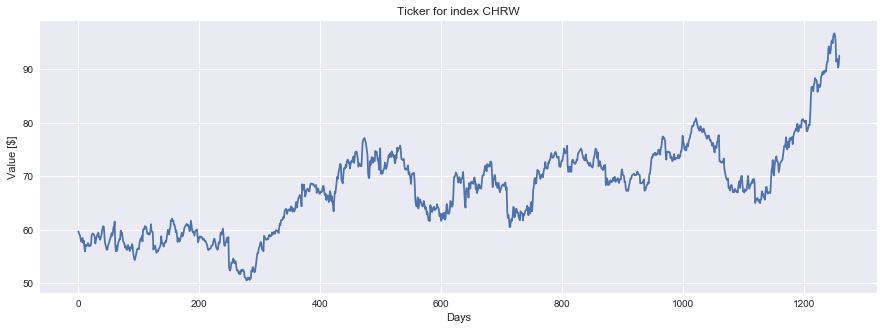

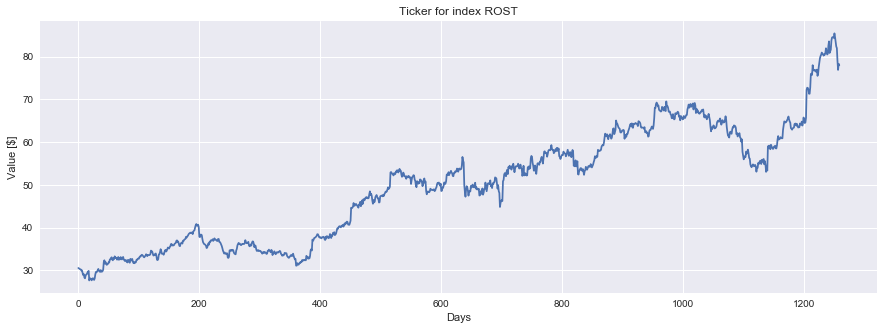

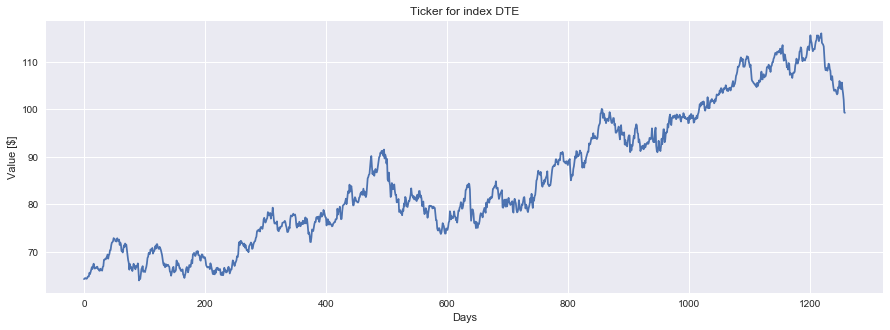

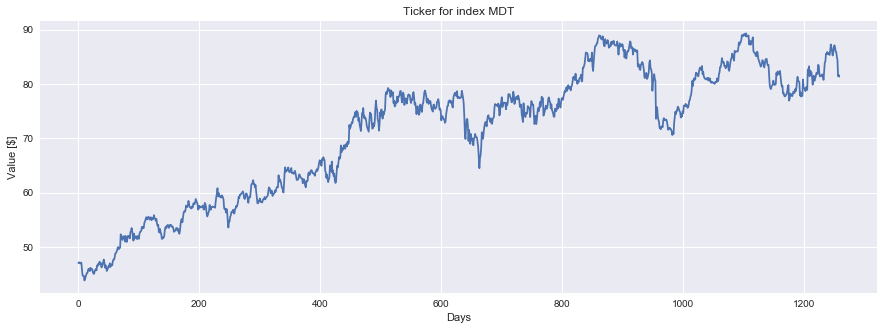

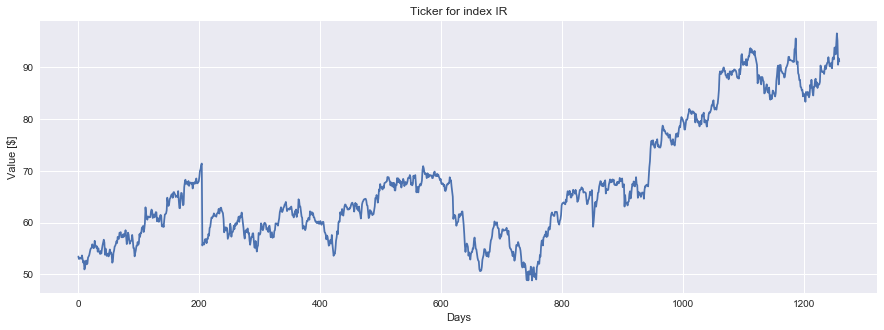

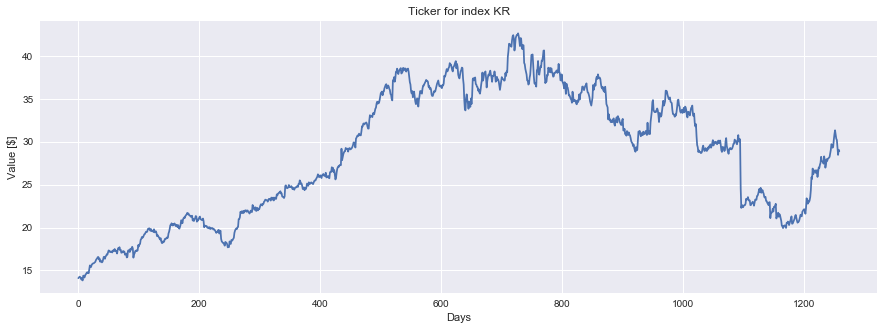

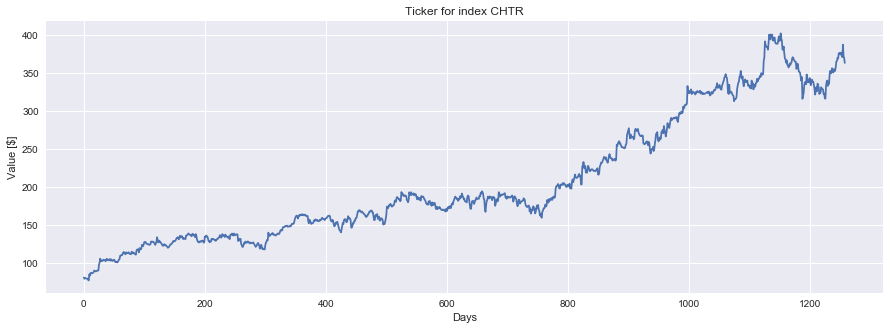

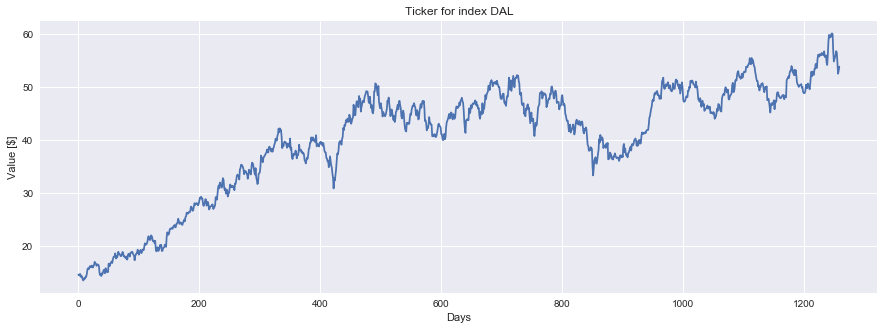

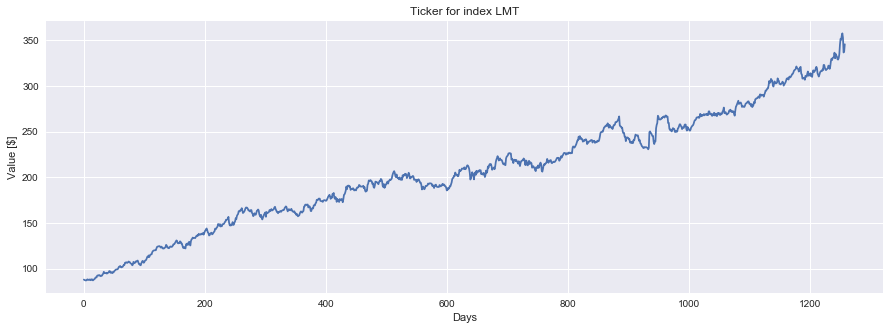

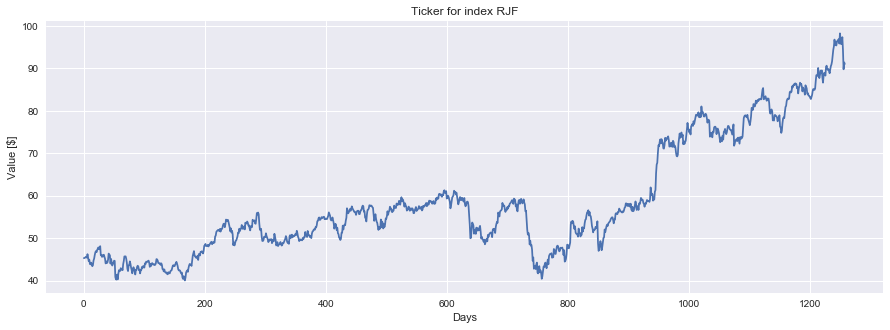

In [4]:
indices = rnd.permutation(np.arange(0,tickers.shape[0]))[:10]

for idx in indices:
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(tickers[idx,:])
    plt.title('Ticker for index '+str(names[idx,0]))
    plt.xlabel('Days')
    plt.ylabel('Value [$]')
    plt.show()

In [5]:
# Use as input data the <lookback_len> last days value plus context vector

# Use as labels the change in value over the next <forecast_len> days, quantized to 
#   {high positive,positive,none,negative,high negative}

In [6]:
dtickers = []

for cID in range(tickers.shape[0]):
    dtickers.append(delta_categorize(tickers[cID,:]))
dtickers = np.stack(dtickers,axis=0) 

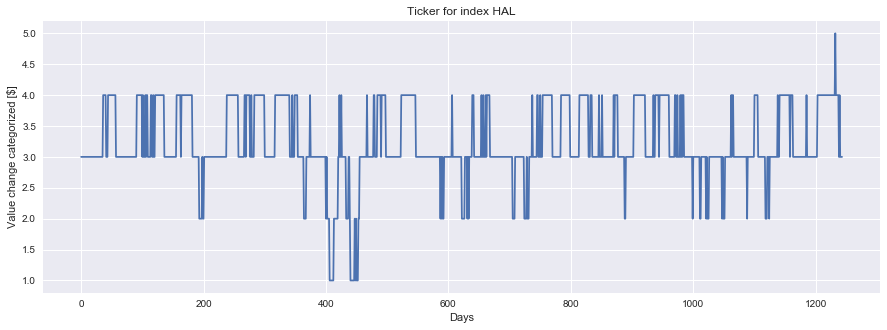

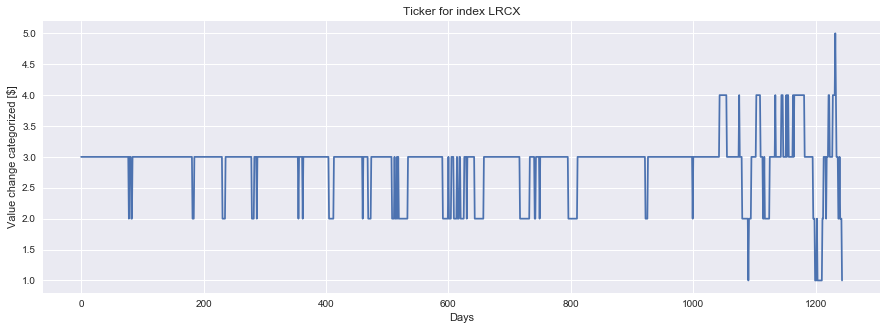

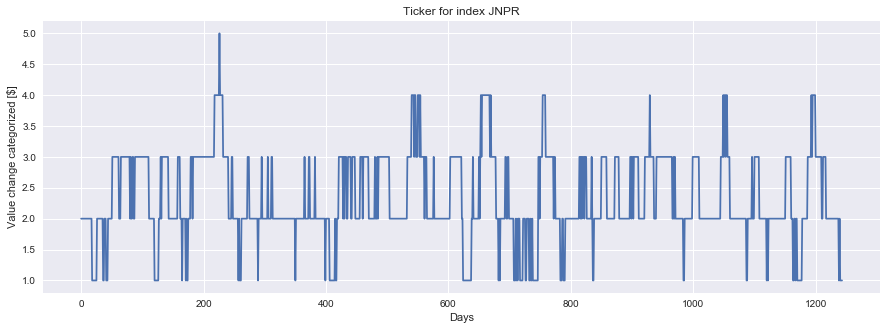

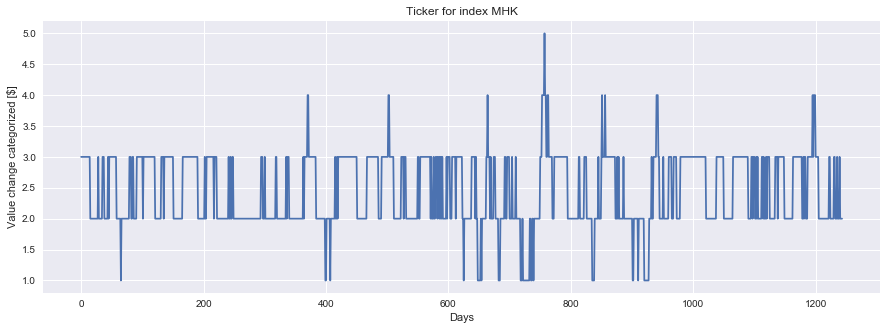

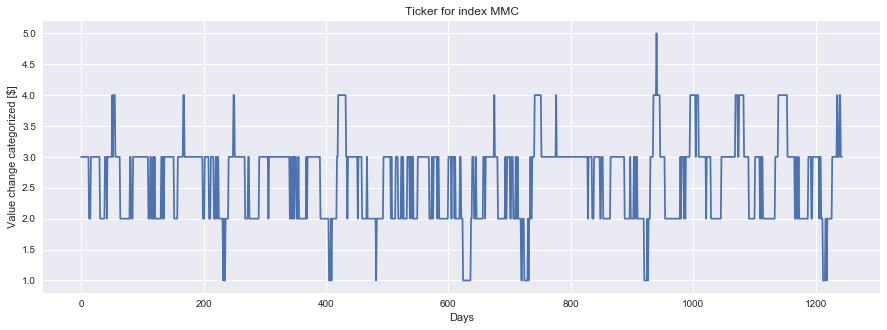

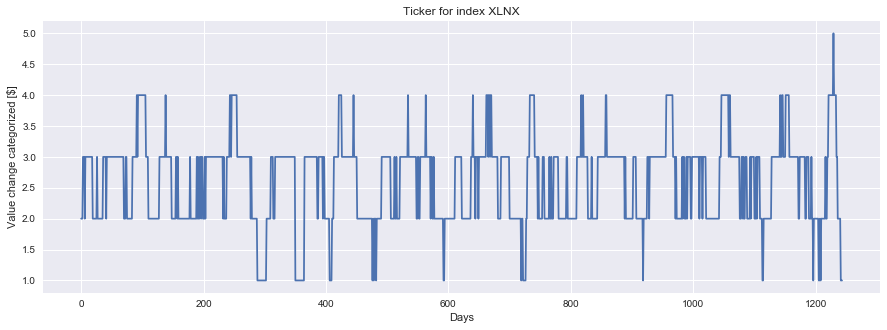

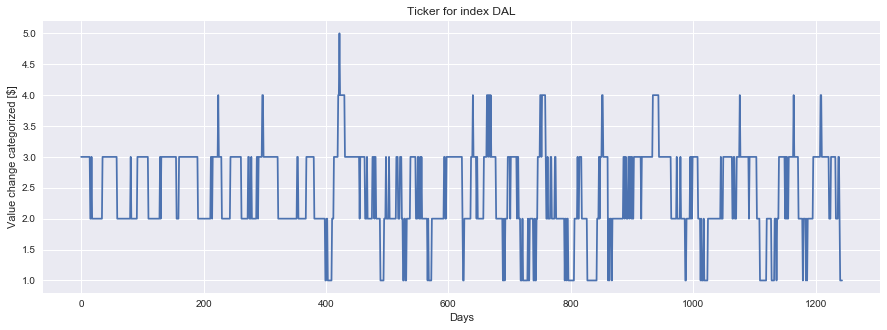

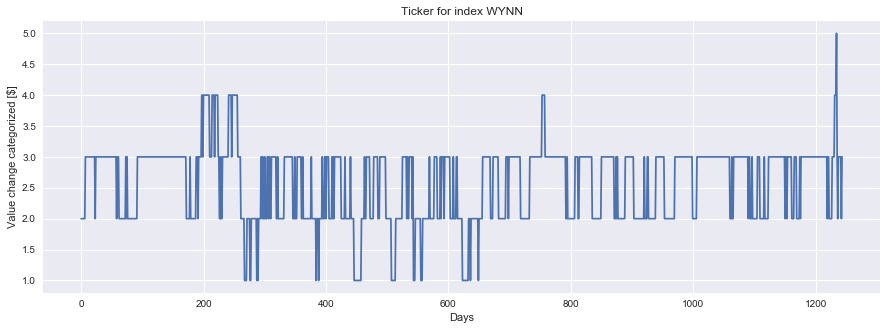

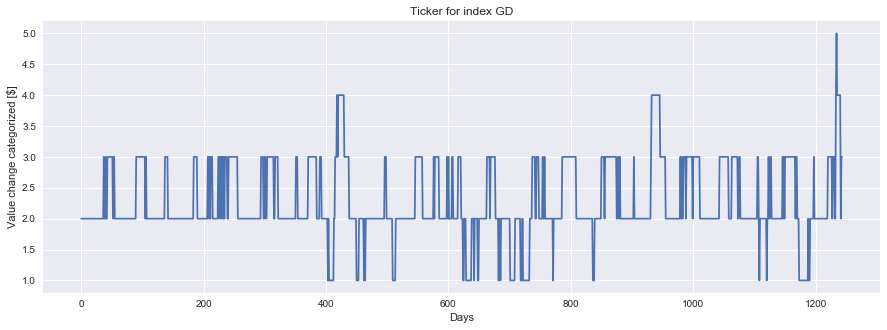

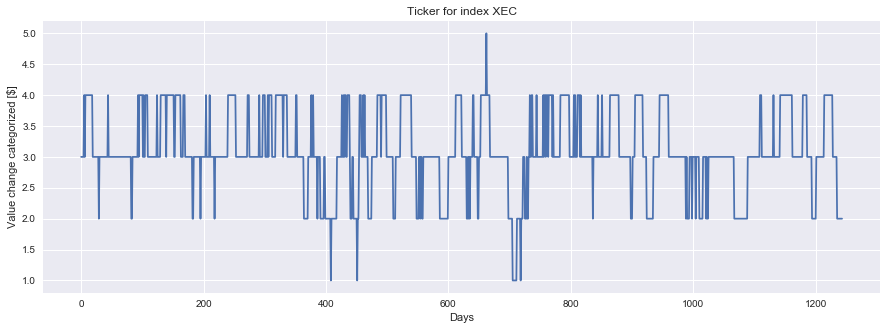

In [7]:
indices = rnd.permutation(np.arange(0,dtickers.shape[0]))[:10]

for idx in indices:
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(dtickers[idx,:])
    plt.title('Ticker for index '+str(names[idx,0]))
    plt.xlabel('Days')
    plt.ylabel('Value change categorized [$]')
    plt.show()

In [73]:
lookback = 25

DATA = []

for k in range(lookback,dtickers.shape[1]):
    DATA.append(dtickers[:,k-lookback:k].reshape(lookback,dtickers.shape[0]))
DATA = np.stack(DATA,axis=0)

In [ ]:
num_neurons = 25

enc_in = Input(shape=(lookback,DATA.shape[2]))
encoder = LSTM(num_neurons,return_state=True)

enc_out,state_h,state_c = encoder(enc_in)
enc_states = [state_h,state_c]

dec_in = Input(shape=())

In [78]:
model = Sequential()

model.add(LSTM(units=100,input_shape=(lookback,DATA.shape[2],)))
model.add(Dense(lookback,DATA.shape[2]))

TypeError: `Dense` can accept only 1 positional arguments ('units',), but you passed the following positional arguments: [25, 470]

In [75]:
model.compile(optimizer='RMSProp',loss='mse',metrics=['accuracy'])

In [77]:
model.fit(DATA,DATA,batch_size=3,epochs=5)

ValueError: Error when checking target: expected dense_6 to have 2 dimensions, but got array with shape (1219, 25, 470)

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               228400    
_________________________________________________________________
dense_5 (Dense)              (None, 25)                2525      
Total params: 230,925
Trainable params: 230,925
Non-trainable params: 0
_________________________________________________________________
